In [1]:
from glob import glob
import os, re

import matplotlib.pyplot as plt
import numpy as np
import ROOT as rt
import root_numpy as rtnp
from histo_utilities import create_TH1D

from cebefo_style import cebefo_style
cebefo_style()

Welcome to JupyROOT 6.10/08


In [2]:
hlf_features = ['HT', 'METp', 'METo', 'MT', 'nJets', 
                'bJets', 'allJetMass', 'LepPt', 'LepEta', 
                'LepIsoCh', 'LepIsoGamma', 'LepIsoNeu', 'LepCharge', 
                'LepIsEle', 'nMu', 'allMuMass', 'allMuPt', 'nEle', 
                'allEleMass', 'allElePt', 'nChHad', 'nNeuHad', 'nPhoton']

active_hlf_features = ['HT', 'allJetMass',
                       'allMuPt', 'allMuMass',
                       'allElePt','allEleMass',
                       'LepPt', 'LepIsoCh', 'LepIsoGamma', 'LepIsoNeu',
                       
                       'METp', 'METo',
                       
                       'MT',
                       
                       'nMu', 'nJets', 'bJets', 'nEle', 
                       
                       'LepCharge','LepIsEle', 
                       
                       'nChHad', 'nNeuHad']

sel = []
for a in active_hlf_features:
    for i,f in enumerate(hlf_features):
        if a == f:
            sel.append(i)

x_axis_label = [ 'S_{T} [GeV]', 'Jets Mass [GeV]',
                'Muons P_{T} [GeV]', 'Muons Mass [GeV]',
                'Electrons P_{T} [GeV]', 'Electrons Mass [GeV]',
                'Lep P_{T} [GeV]', 'ChPFIso', 'GammaPFIso', 'NeuPFIso',
                
#                 'METp [GeV]', 'METo [GeV]',
                'p_{T #parallel}^{miss}', 'p_{T #perp}^{miss}',
                
                'M_{T} [GeV]',
                
                'Muons number', 'Jets number', 'b-tagged jets number', 'Electrons number',
                
                'Lep Charge [e]','IsEle',
                
                'Charged Had number', 'Neutral Had number']

sel = []
for a in active_hlf_features:
    for i,f in enumerate(hlf_features):
        if a == f:
            sel.append(i)

In [3]:
len(active_hlf_features)

21

In [4]:
folder = '../data/HLF_ONLY/'
datasets = glob(folder+'*.npy')

dataset_path = {}
for path in datasets:
    n = os.path.basename(path)
    aux = re.search(r'[a-zA-Z0-9]+_', n)
    name = aux.group(0)[:-1]
    print name, ' ---> ', path
    dataset_path[name] = path

Ato4l  --->  ../data/HLF_ONLY/Ato4l_sample.npy
hChToTauNu  --->  ../data/HLF_ONLY/hChToTauNu_sample.npy
hToTauTau  --->  ../data/HLF_ONLY/hToTauTau_sample.npy
leptoquark  --->  ../data/HLF_ONLY/leptoquark_sample.npy
qcd  --->  ../data/HLF_ONLY/qcd_sample.npy
ttbar  --->  ../data/HLF_ONLY/ttbar_sample.npy
Wlnu  --->  ../data/HLF_ONLY/Wlnu_sample.npy
Wprime  --->  ../data/HLF_ONLY/Wprime_sample.npy
Zll  --->  ../data/HLF_ONLY/Zll_sample.npy
Zprime  --->  ../data/HLF_ONLY/Zprime_sample.npy


In [73]:
DS_name = {'Wlnu':'W',
           'qcd':'QCD',
           'Zll':'Z',
           'ttbar':'t#bar{t}',
           'Ato4l':'A #rightarrow 4l', 
           'hToTauTau':'h^{0} #rightarrow #tau#tau', 
           'hChToTauNu':'h^{+} #rightarrow #tau#nu',
           'Wprime':'W^{\'}',
           'Zprime':'Z^{\'}',
           'leptoquark':'LQ'}

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_out
Info in <TCanvas::SaveAs>: ROOT file ../fig/paper_fig/SM_HLF_Summary.root has been created
Info in <TCanvas::Print>: png file ../fig/paper_fig/SM_HLF_Summary.png has been created
Info in <TCanvas::Print>: png file ../../www/DatasetCheck/SM_HLF_Summary.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_leg
Info in <TCanvas::Print>: png file ../fig/paper_fig/SM_HLF_Summary_leg.png has been created


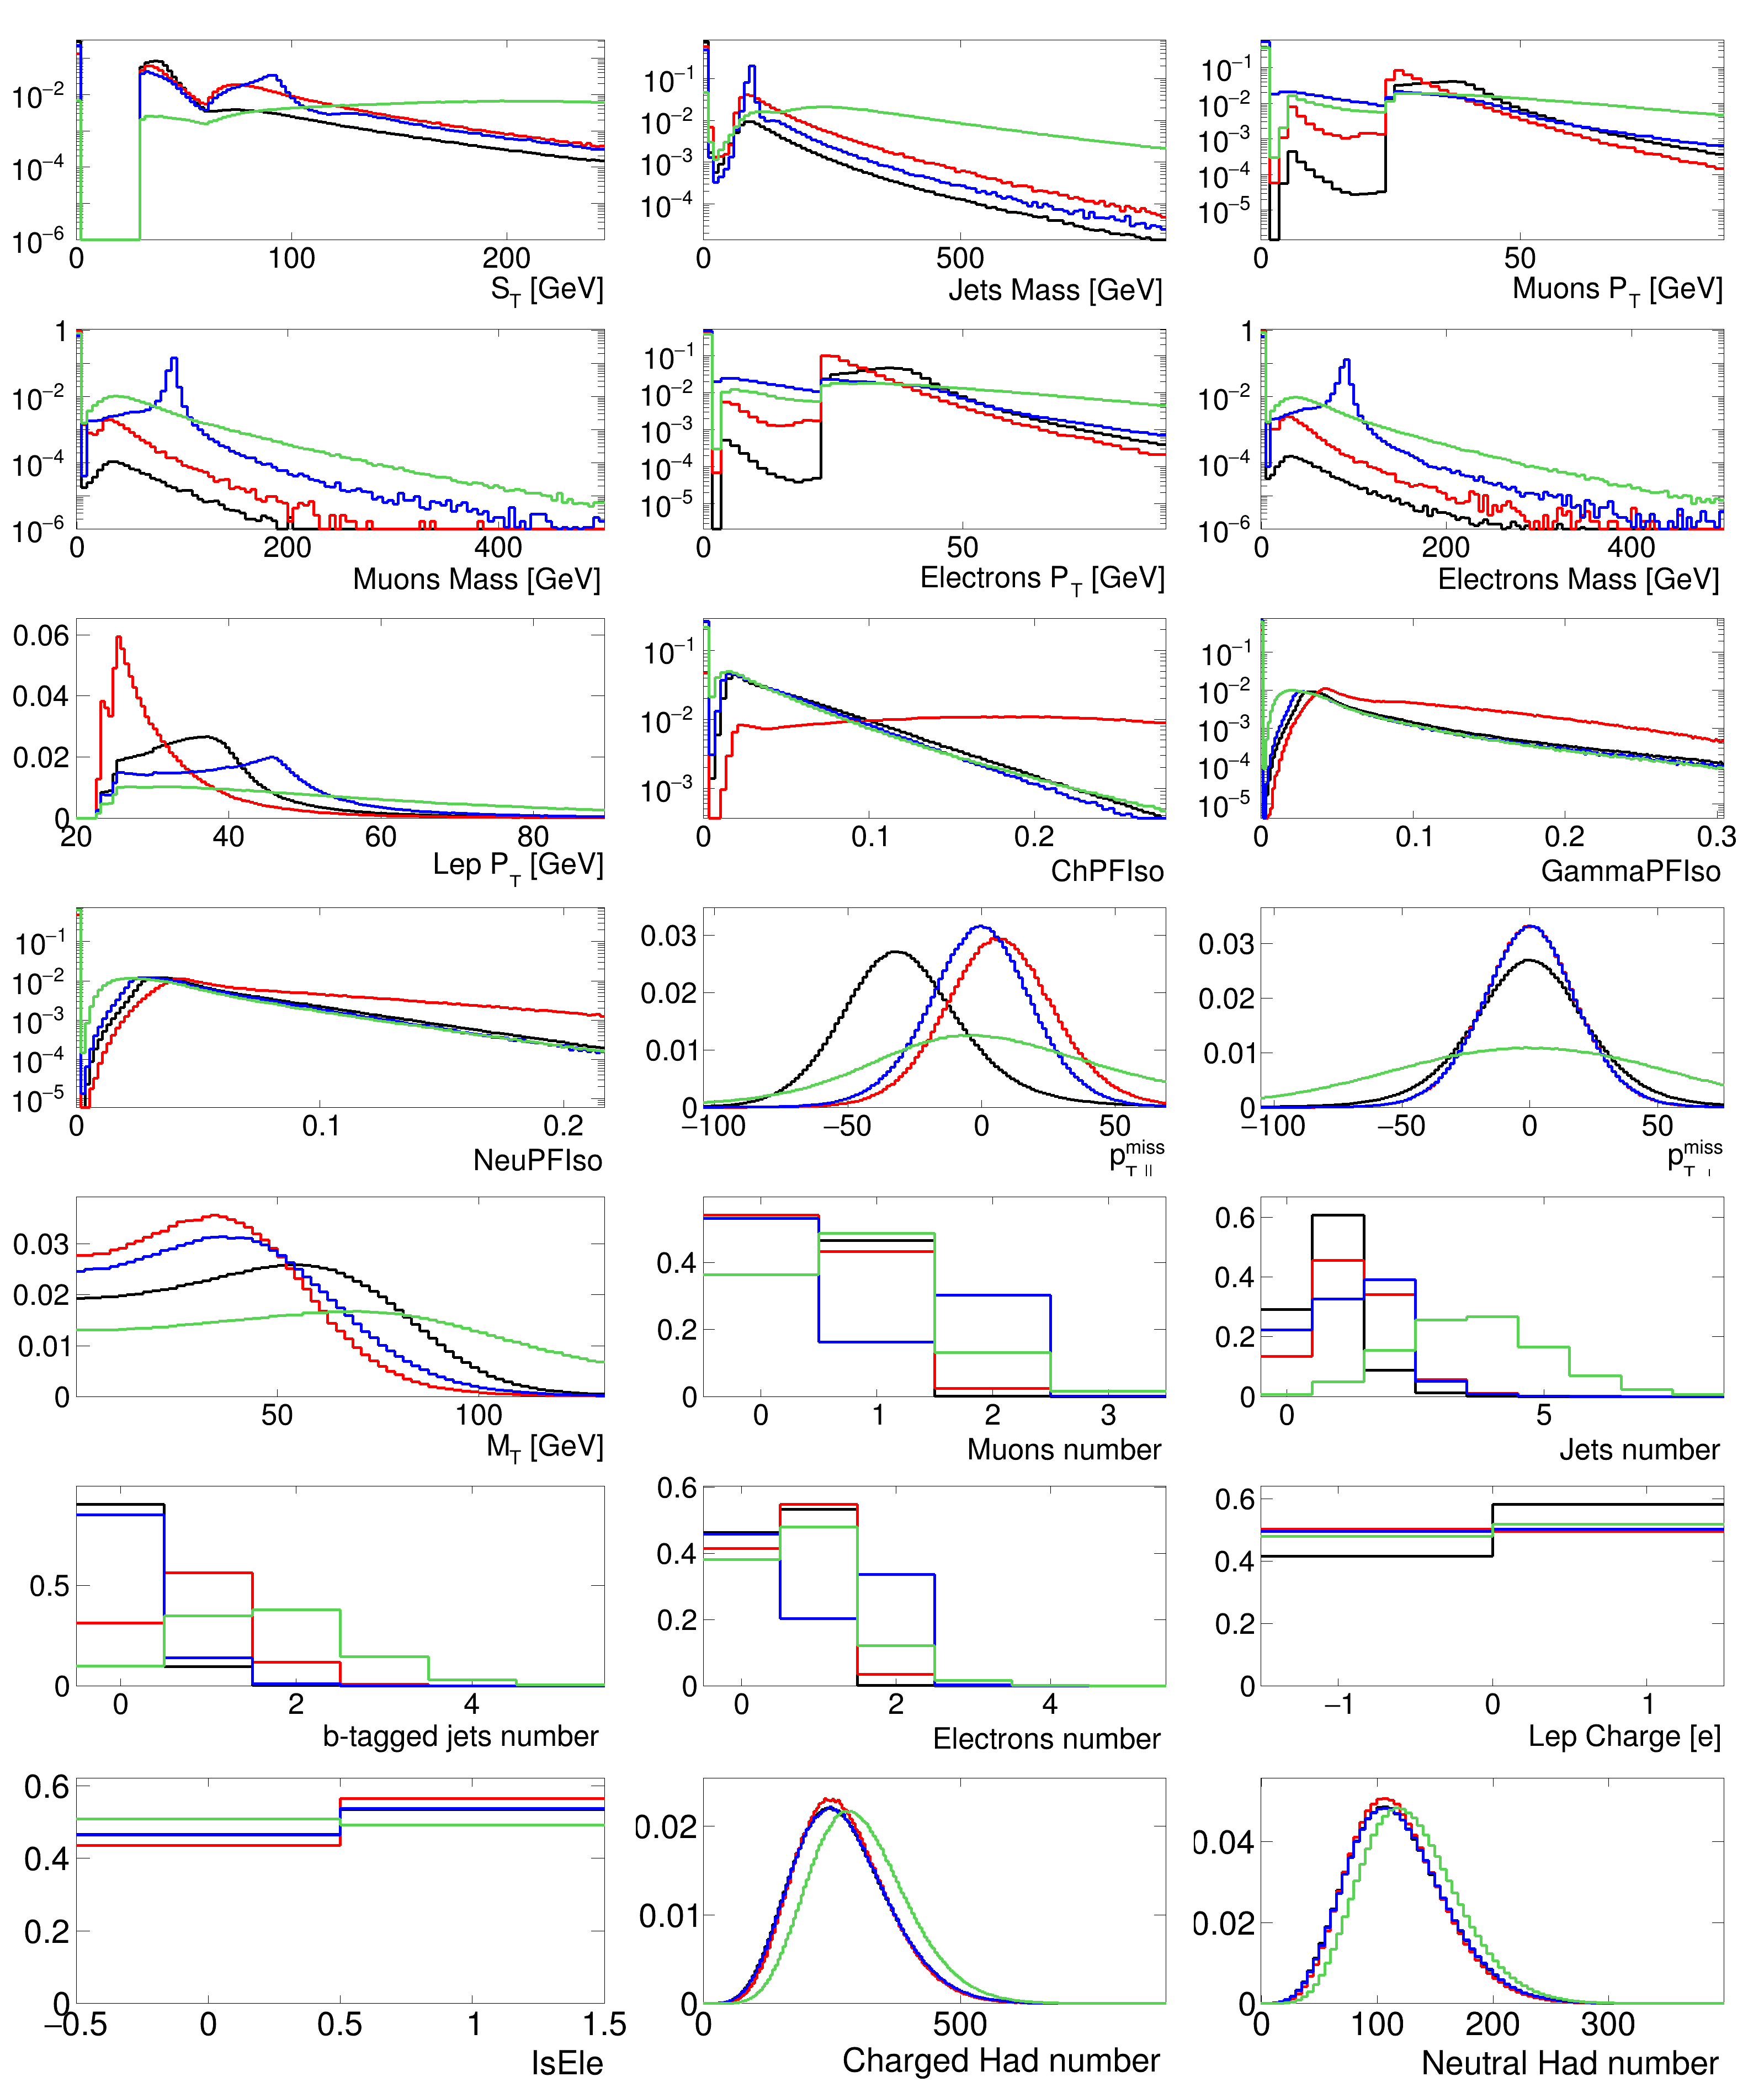

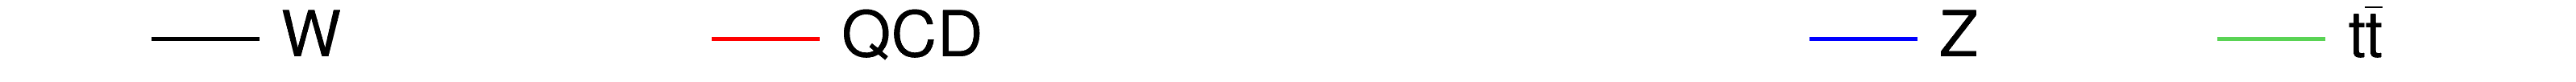

In [75]:
dnd = []

c = rt.TCanvas('c_out', 'c_out', 3200, 3800)
c.Divide(3,7, 0., 0.005)

colors = [1,2,4,8,46, 30, 40]

binning_list = []

max_prob_hlf = np.zeros(len(active_hlf_features))

leg = rt.TLegend(0.05, 0.05, 1, 1)
# leg.SetNColumns(2)
leg.SetLineWidth(0)

# for DS in dataset_path.keys():
# DS_name = ['W', 'QCD', 'Z', 't#bar{t}']
for j, DS in enumerate(['Wlnu', 'qcd', 'Zll', 'ttbar']):

# for j, DS in enumerate(['Ato4l', 'hToTauTau', 'hChToTauNu', 'leptoquark']):    

    arr = np.load(dataset_path[DS])[:, sel]
    for i, nhlf in enumerate(active_hlf_features):
        a = arr[:, i]
        
        tag = '_{}_{}'.format(DS, nhlf)
        
        if j==0:
            if nhlf == 'allJetMass':
                binning = [90, 0, 900]
            elif nhlf in ['nChHad', 'nNeuHad']:
                up = int(np.max(a) - int(np.max(a))%5 -1)
                binning = [(up+1)/5, -0.5, up+0.5]
            elif nhlf in ['nMu', 'nEle', 'nJets', 'bJets']:
                length = np.max(a) - np.min(a) + 1
                binning = [int(length), np.min(a)-0.5, np.max(a)+0.5]
            elif nhlf in ['LepIsEle', 'LepCharge']:
                binning = [2, np.min(a)-0.5, np.max(a)+0.5]
            elif nhlf in ['allEleMass', 'allMuMass']:
                binning = [100, -0.5, 500.]  
            elif nhlf == 'LepPt':
                bin_w = 10*(np.percentile(a,75) - np.percentile(a,25))/(len(a))**(1./3.)
                if bin_w == 0:
                    bin_w = np.std(a)/5
                binning = [None, 20, np.percentile(a, 99.)]
                binning[0] = int((binning[2] - binning[1])/bin_w) + 2
            else:
                bin_w = 10*(np.percentile(a,75) - np.percentile(a,25))/(len(a))**(1./3.)
                if bin_w == 0:
                    bin_w = np.std(a)/5
                binning = [None, np.percentile(a, .1), np.percentile(a, 99.5)]
                binning[0] = int((binning[2] - binning[1])/bin_w) + 2
            binning_list.append(binning)

        h = create_TH1D(a, 'h'+tag, '', binning=binning_list[i])
        h.SetLineWidth(5)
        h.SetXTitle(x_axis_label[i])
#         h.SetYTitle('Probability')
        h.GetXaxis().SetTitleOffset(1.02)
        h.GetXaxis().SetLabelOffset(0.01)
        h.GetYaxis().SetLabelOffset(0.01)
    
        h.GetXaxis().SetTitleSize(0.11)
        h.GetXaxis().SetLabelSize(0.11)
        h.GetYaxis().SetLabelSize(0.11)
        
        h.GetYaxis().SetNdivisions(4,0,0)
        h.GetXaxis().SetNdivisions(4,0,0)
    
        h.Scale(1./h.GetEntries())
        max_prob_hlf[i] = max(max_prob_hlf[i], h.GetMaximum())
        
        h.SetStats(0)
        h.SetLineColor(colors[j])

        opt = ''
        if j != 0:
            opt += 'SAME'
        pad = c.cd(i+1)
        h.Sumw2(0)
        h.Draw(''+opt)

        if j==0:
            pad.SetGrid(0,0)
            pad.SetTopMargin(0.07)
            pad.SetBottomMargin(0.24)
            pad.SetRightMargin(0.05)            
            pad.SetLeftMargin(0.12)            
            if nhlf.startswith('LepIso') or nhlf.startswith('all') or nhlf=='HT':
                pad.SetLogy()
            else:
                h.GetYaxis().SetRangeUser(0, h.GetMaximum()*1.1)
            
        dnd.append(h)
    l = rt.TLine()
    l.SetLineWidth(5)
    l.SetLineColor(colors[j])
    leg.AddEntry(l, DS_name[DS], 'l')
    dnd.append(l)
        
for i in range(len(active_hlf_features)):
    dnd[i].GetYaxis().SetRangeUser(1e-6+dnd[i].GetMinimum(), 1.1*max_prob_hlf[i])

c.Update()
c.Draw()
c.SaveAs('../fig/paper_fig/SM_HLF_Summary.root')
c.SaveAs('../fig/paper_fig/SM_HLF_Summary.png')
c.SaveAs('../../www/DatasetCheck/SM_HLF_Summary.png')
dnd.append(c)

c2 = rt.TCanvas('c_leg', 'c_leg', 3200, 130)
c2.cd()
leg.SetNColumns(4);
# h = rt.TH1F('hvoid','hvoid',1,0,1)
# h.Draw('SAME')
leg.Draw()
c2.Draw()
c2.SaveAs('../fig/paper_fig/SM_HLF_Summary_leg.png')

In [36]:
DS_name

{'Ato4l': '{A \\ \\ \\  4\\ell}',
 'Wlnu': 'W',
 'Wprime': "W^{'}",
 'Zll': 'Z',
 'Zprime': "Z^{'}",
 'hChToTauNu': 'h^{+} #rightarrow #tau#nu',
 'hToTauTau': 'h^{0} #rightarrow #tau#tau',
 'leptoquark': 'LQ',
 'qcd': 'QCD',
 'ttbar': 't#bar{t}'}